# Descriptive Data Statistics 

In [1]:
library(ggplot2)
library(reshape2)
library(readr)
library(readxl)

In [2]:
data <- read_excel('/Users/gabriel/Documents/GitHub/GabrielDelC/Tesis data/Data final 1.xlsx')

data$Fecha <- as.Date(data$Fecha, format = "%d/%m/%y")
print(data)

# A tibble: 87 x 13
   Fecha      BZSCORE   NPL GOBLAL_CAP BANK_CON  CREDIT INFLATION GROWTH_VOL
   <date>       <dbl> <dbl>      <dbl>    <dbl>   <dbl>     <dbl>      <dbl>
 1 2001-03-31    17.0 10.4        12.5    1635. -32.5       2.06        3.15
 2 2001-06-30    16.4 10.2        12.2    1650.   6.86     -1.29        3.88
 3 2001-09-30    16.5  9.98       12.7    1622. -14.8       0.245       3.95
 4 2001-12-31    16.5  9.46       13.2    1598.  -6.93     -0.149       3.92
 5 2002-03-31    16.6  9.14       13.0    1568.   2.11     -2.89        3.91
 6 2002-06-30    16.9  8.48       13.1    1548.   0.388     3.08        4.02
 7 2002-09-30    16.5  8.25       12.9    1567.   9.26      1.08        4.17
 8 2002-12-31    16.8  8.03       13.4    1563.  -7.97      4.44        4.27
 9 2003-03-31    16.6  7.85       13.1    1676. -16.3       2.49        3.90
10 2003-06-30    16.7  7.76       13.0    1870.   5.64      1.47        2.33
# i 77 more rows
# i 5 more variables: FISCAL_VOL <dbl>,

In [3]:
# Excluir la columna no numérica (Fecha) y convertir el resto a numérico si es necesario
numeric_data <- data[sapply(data, is.numeric)]

# Calcular la matriz de correlaciones
cor_matrix <- cor(numeric_data, use = "pairwise.complete.obs") 

# Convertir la matriz de correlación a formato largo para ggplot2
cor_long <- melt(cor_matrix)

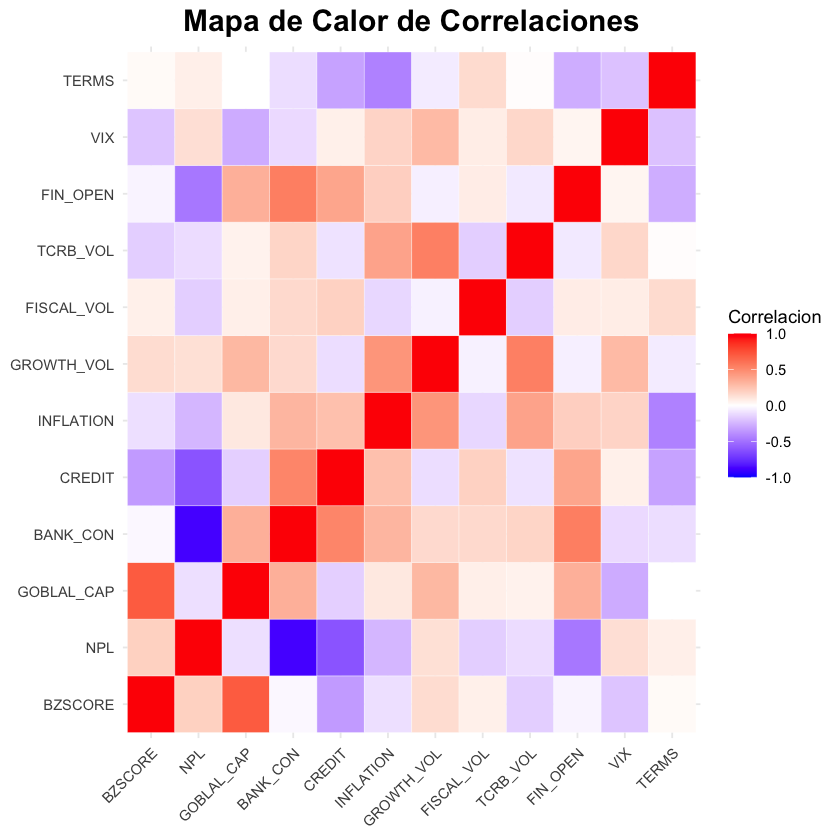

In [75]:
heatmap <- ggplot(cor_long, aes(Var1, Var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(
    low = "blue", high = "red", mid = "white", 
    midpoint = 0, limit = c(-1, 1), space = "Lab", 
    name = "Correlacion"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5) # Título más grande y centrado
  ) +
  labs(
    x = NULL, 
    y = NULL, 
    title = "Mapa de Calor de Correlaciones"
  )

  heatmap

In [76]:
# Guardar el gráfico en formato PNG
ggsave("Correlaciones.png", plot = heatmap, width = 10, height = 8, dpi = 300)


In [1]:
install.packages("moments")


The downloaded binary packages are in
	/var/folders/k0/5jhn7d7s1l75cf1srqv1wy980000gn/T//RtmpFJZNAx/downloaded_packages


In [4]:
library(dplyr)
library(tidyr)
library(moments)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'tidyr'


The following object is masked from 'package:reshape2':

    smiths




In [4]:
install.packages("gridExtra")


The downloaded binary packages are in
	/var/folders/k0/5jhn7d7s1l75cf1srqv1wy980000gn/T//RtmpFJZNAx/downloaded_packages


In [19]:
library(ggplot2)
library(gridExtra)
library(grid)

In [5]:
variables <- names(numeric_data)
variables

[1] "BZSCORE"    "NPL"        "GOBLAL_CAP" "BANK_CON"   "CREDIT"    
 [6] "INFLATION"  "GROWTH_VOL" "FISCAL_VOL" "TCRB_VOL"   "FIN_OPEN"  
[11] "VIX"        "TERMS"

In [6]:
# Ajustar gráficos eliminando los títulos de los ejes
plots <- lapply(variables, function(var) {
  ggplot(data, aes(x = Fecha, y = .data[[var]])) +
    geom_line(color = "blue", linewidth = 0.8) +  # Usar linewidth para las líneas
    theme_minimal() +
    labs(title = var, x = NULL, y = NULL) +  # Sin títulos en los ejes
    theme(
      plot.title = element_text(size = 25, face = "bold", hjust = 0.5),
      axis.text.x = element_text(size = 20),  # Ajustar tamaño del texto de los ejes
      axis.text.y = element_text(size = 20)
    )
})

In [38]:
png("series_tiempo_grande.png", width = 1600, height = 1200) # Guardar como PNG

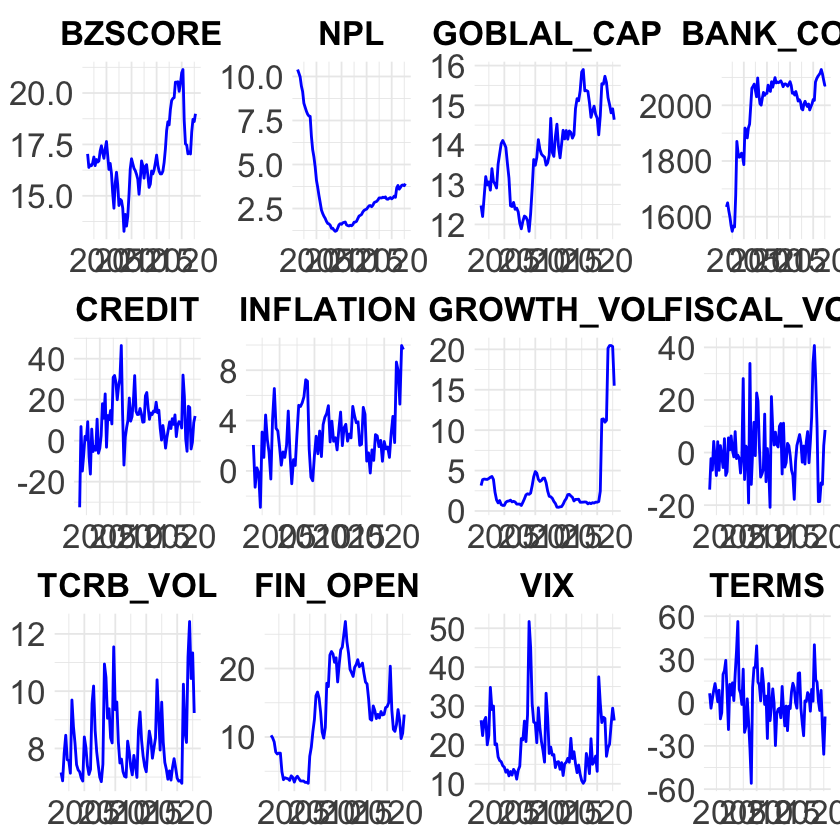

In [82]:
grid.arrange(grobs = plots, ncol = 4, nrow = 3, 
             top = textGrob(NULL, gp = gpar(fontsize = 20, fontface = "bold")))

In [86]:
# Ajustar las dimensiones generales del gráfico
png("Series de tiempo.png", width = 2400, height = 1500) # Aumentar dimensiones
grid.arrange(grobs = plots, ncol = 4, nrow = 3, 
             top = textGrob(NULL, gp = gpar(fontsize = 24, fontface = "bold")))
dev.off() # Cerrar dispositivo gráfico


pdf 
  2

In [ ]:
# Crear gráficos de cajas para cada variable
boxplots <- lapply(variables, function(var) {
  ggplot(data, aes(x = "", y = .data[[var]])) + 
    geom_boxplot(fill = "skyblue", color = "darkblue") +
    theme_minimal() +
    labs(title = var, x = NULL, y = NULL) +
    theme(
      plot.title = element_text(size = 25, face = "bold", hjust = 0.5),
      axis.text.x = element_blank(), # Ocultar etiquetas del eje x
      axis.ticks.x = element_blank() # Ocultar marcas del eje x
    )
})

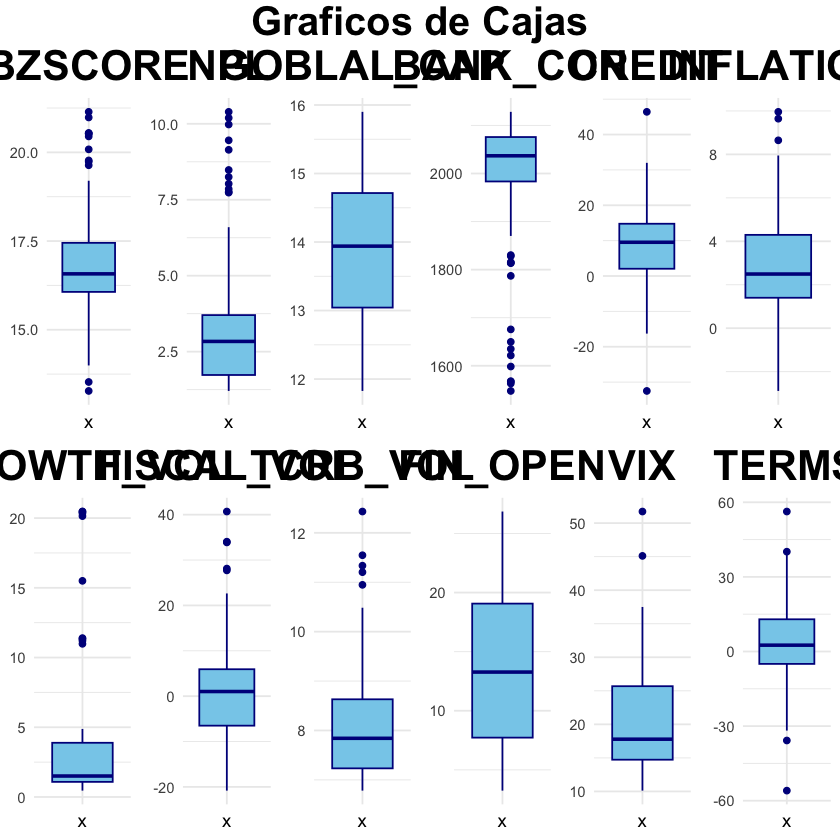

In [101]:
grid.arrange(grobs = boxplots, ncol = 6, nrow = 2, 
             top = textGrob("Graficos de Cajas", gp = gpar(fontsize = 24, fontface = "bold")))

In [102]:
png("boxplots_series33.png", width = 2400, height = 1800) # Ajustar dimensiones
grid.arrange(grobs = boxplots, ncol = 6, nrow = 2, 
             top = textGrob("Gráficos de Cajas", gp = gpar(fontsize = 24, fontface = "bold")))
dev.off()

pdf 
  2